# Classification Assignment

By: Pankajan T.

The Libraries used in this project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.tools import add_constant
from scipy.special import logit
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from IPython.display import Image
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#### We are taking the Dataset about mushrooms

The dataset have 8124 mushroom data each having 23 different properties to themselves.
link for the dataset is: https://www.kaggle.com/datasets/uciml/mushroom-classification

class
edible=e, poisonous=p

cap-shape
bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface
fibrous=f,grooves=g,scaly=y,smooth=s

cap-color
brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises
bruises=t,no=f

odor
almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment
attached=a, descending=d, free=f, notched=n

gill-spacing
close=c,crowded=w,distant=d

gill-size
broad=b,narrow=n

gill-color
black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

In [2]:
df = pd.read_csv('mushrooms.csv', header=0)
df = pd.DataFrame(df)

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
pd.options.display.max_columns = 300
pd.options.display.max_rows = 100

### With this data we are going to predict whether a mmushroom is eedible by its physical attributtes and this is our core mission. So that people can understand the nature of the mushroom fungal growths in their environment. Importantly this project's purpose is predicatbility not interpretablity.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.shape

(8124, 23)

### Here we are going to find out that is the mushroom is poisonouse.

we are using the all the data to find out that if a new mushroom is presented can we identify is it possible to eat the stuff and survive( just for research not recommended for real world application). Here all other 22 properties can be idenitified by physical presence of the mushroom itself.

## Preprocessing and data cleaning

In [7]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


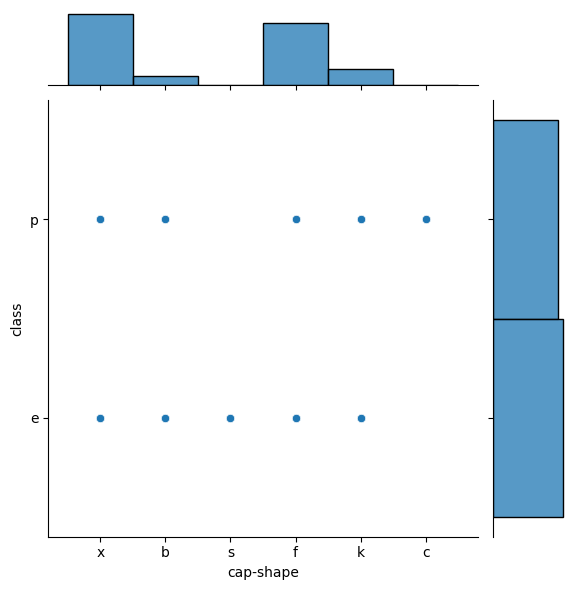

In [8]:
sns.jointplot(x="cap-shape", y="class", data=df)

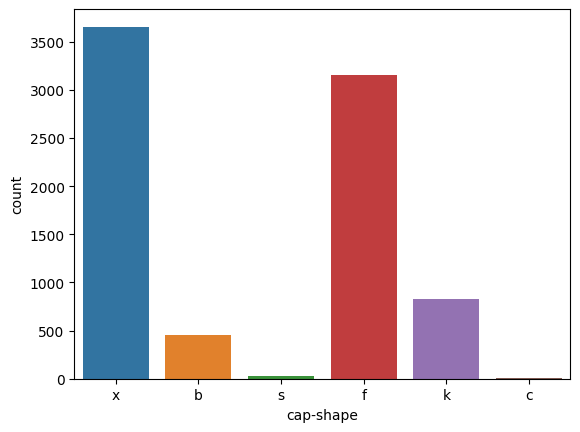

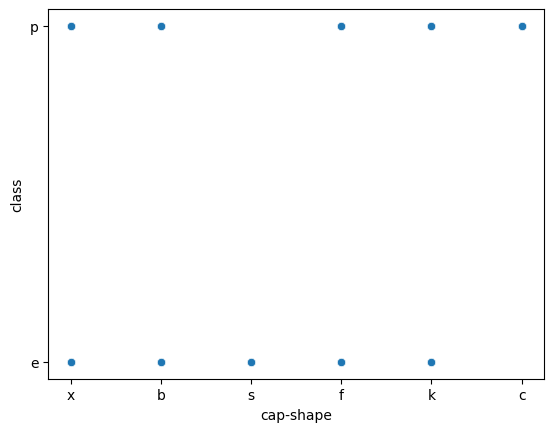

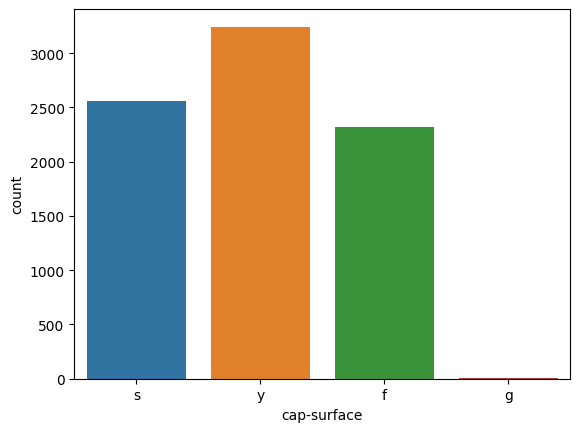

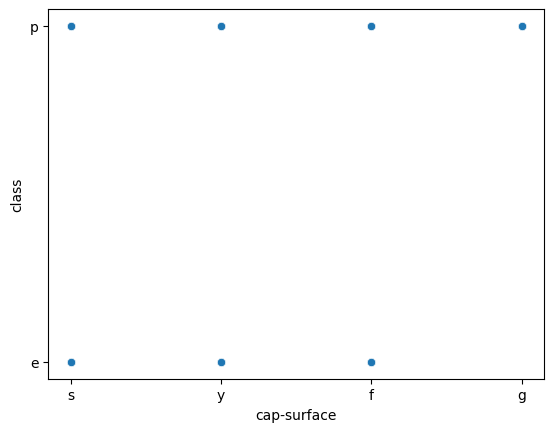

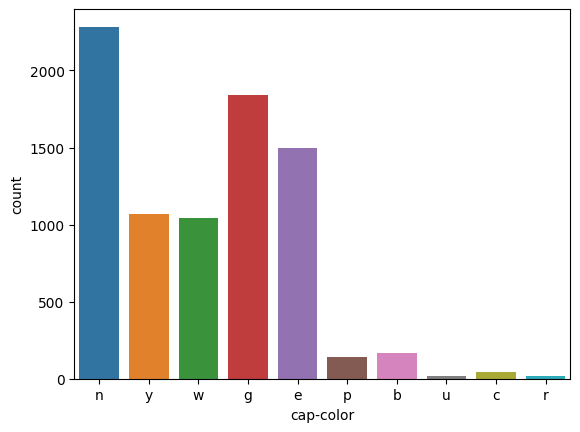

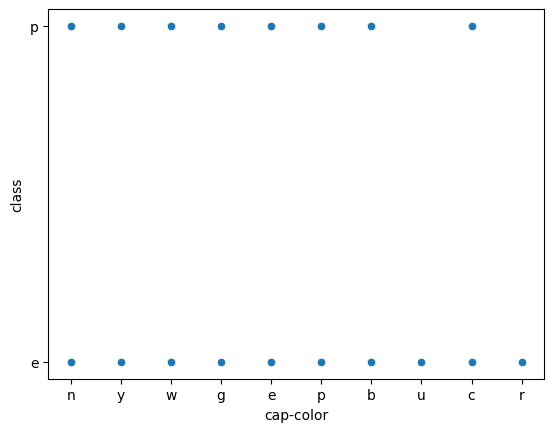

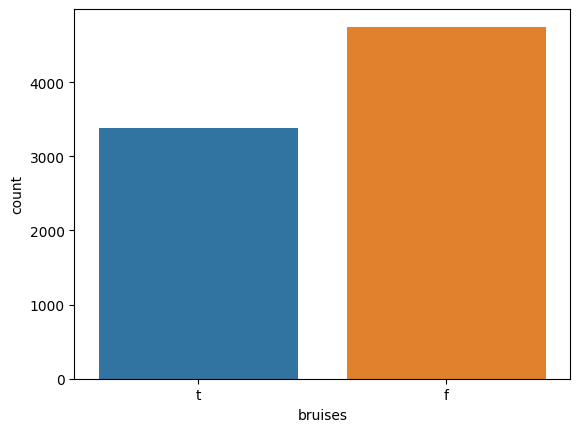

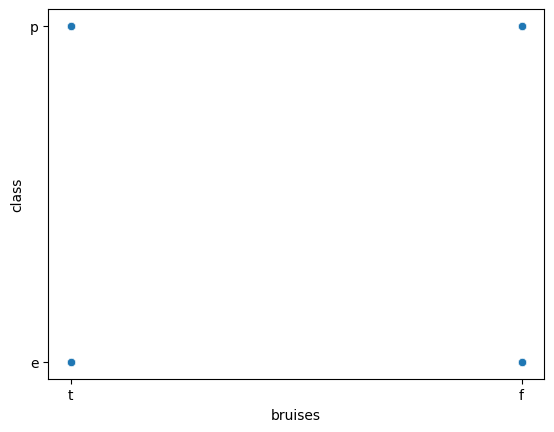

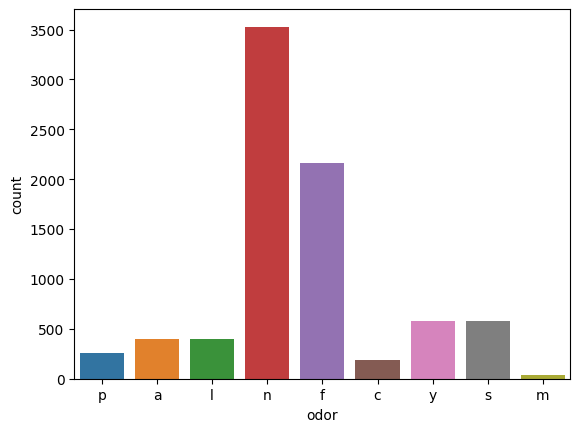

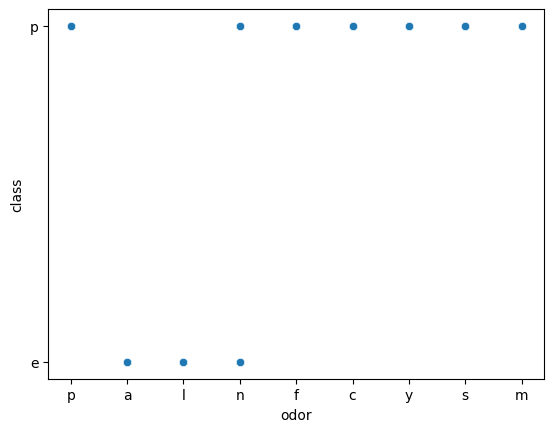

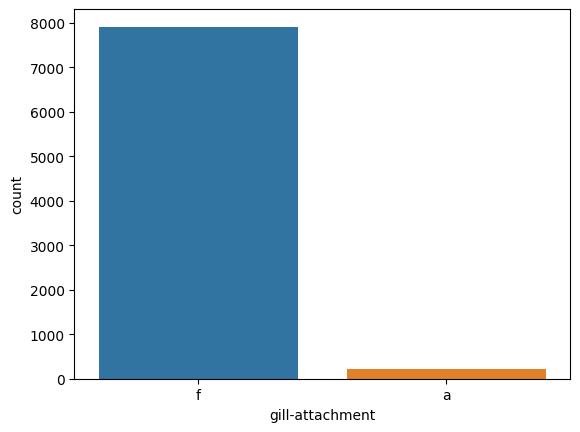

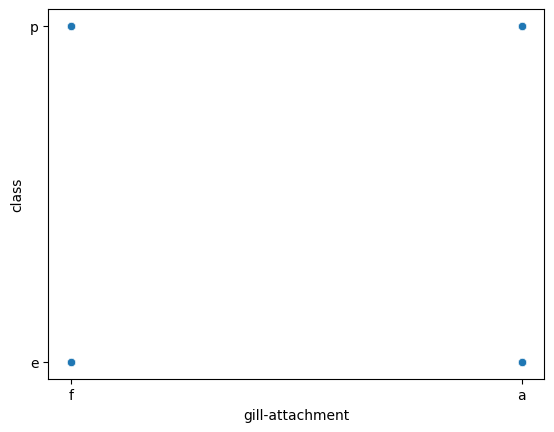

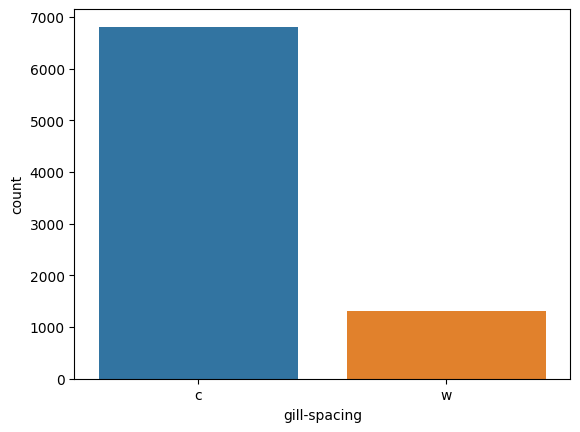

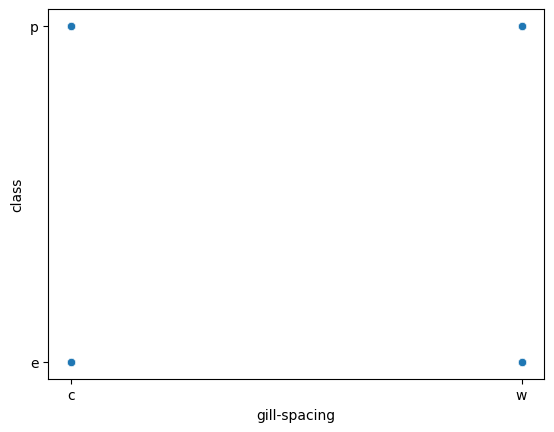

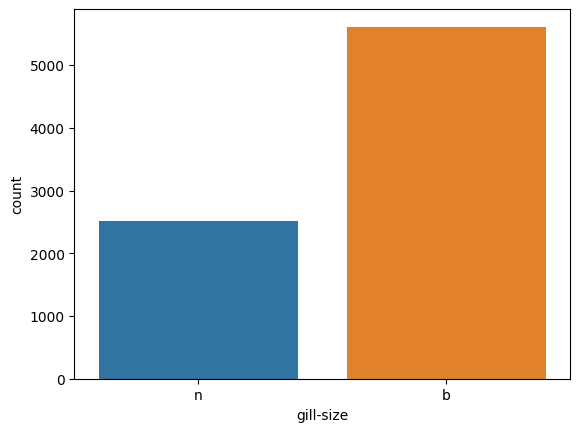

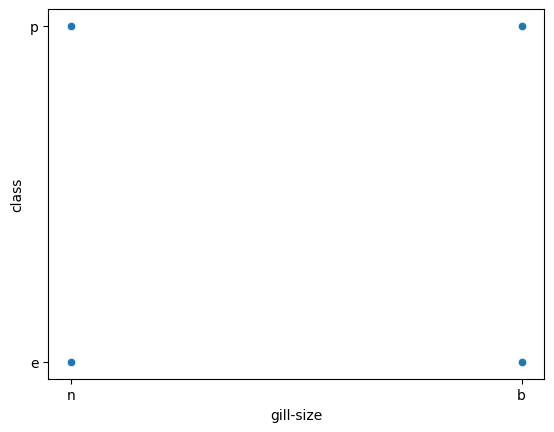

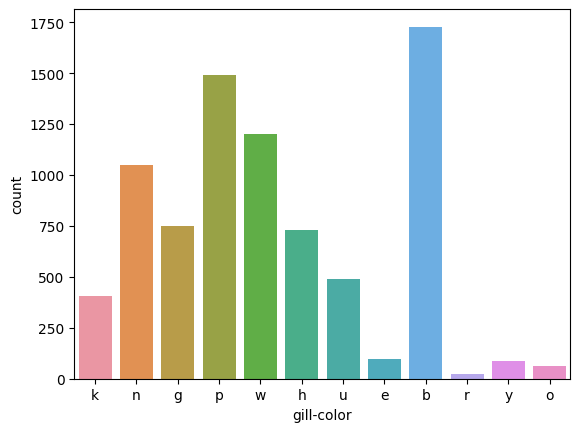

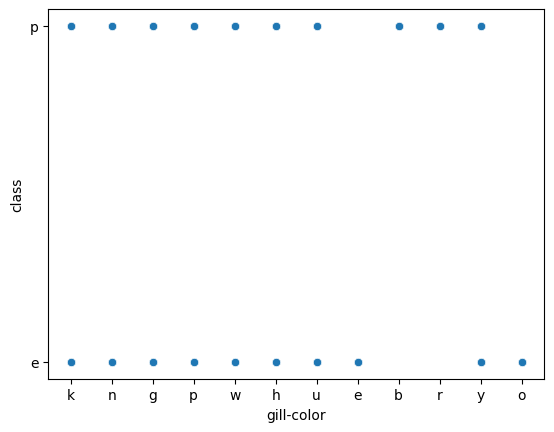

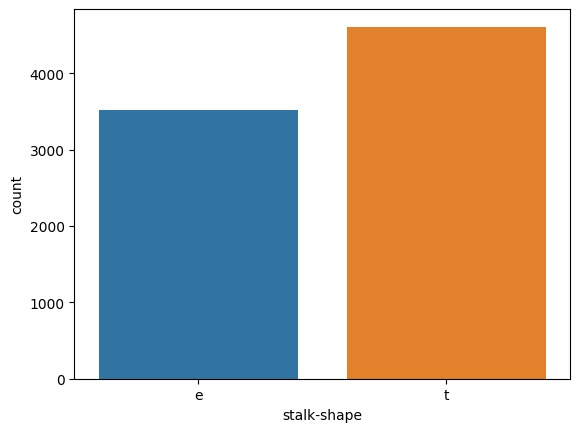

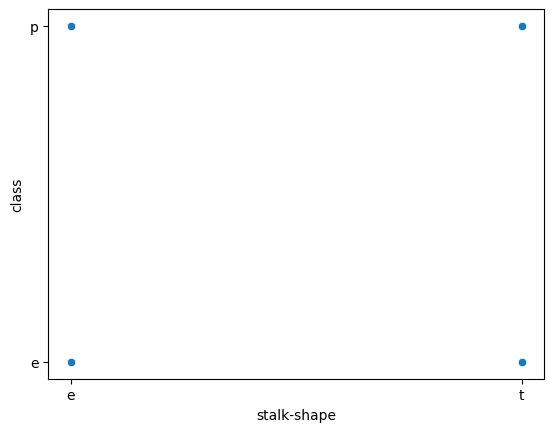

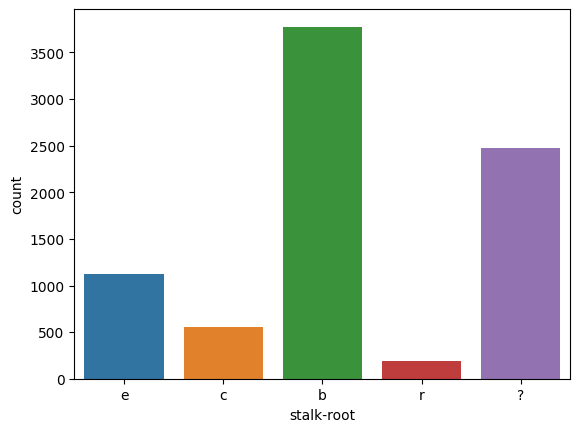

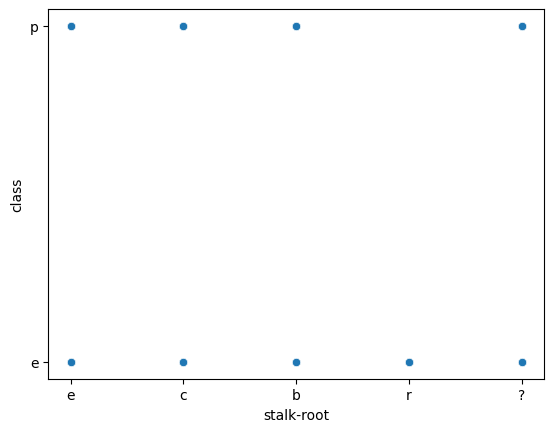

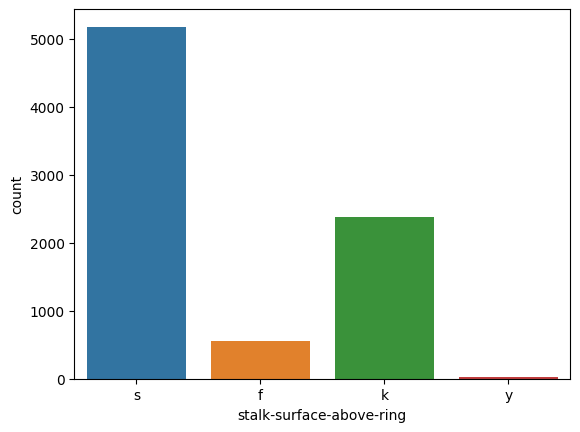

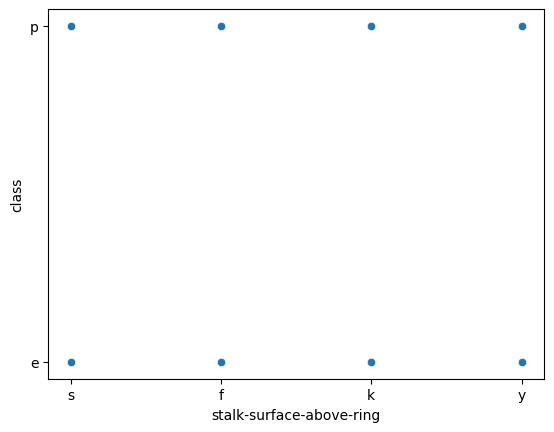

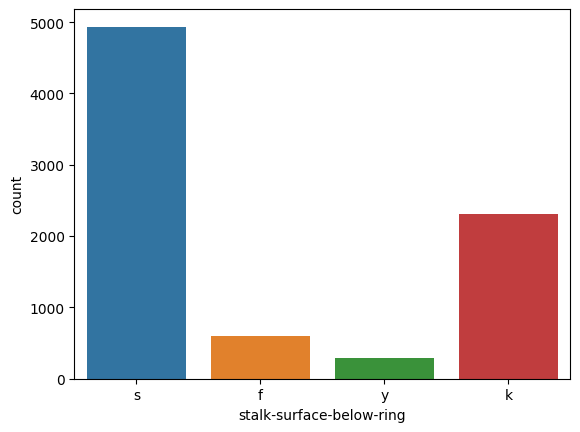

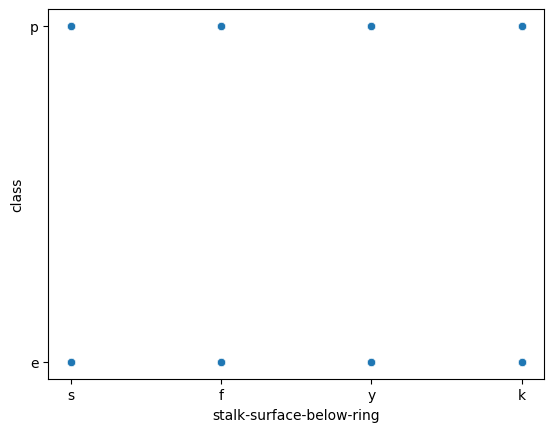

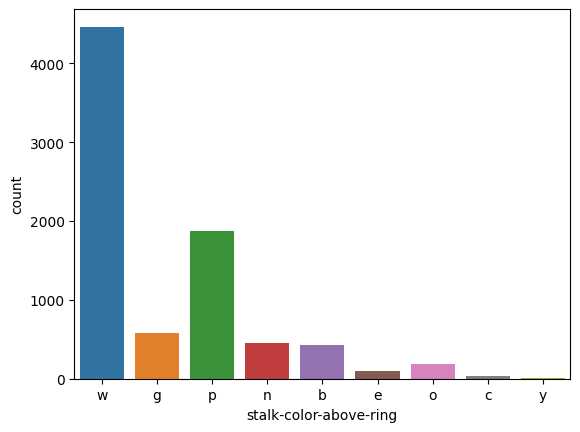

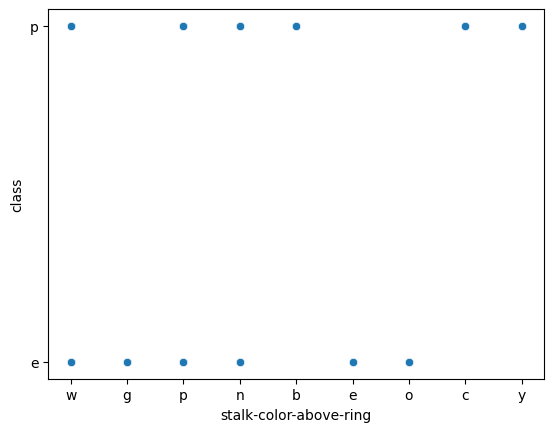

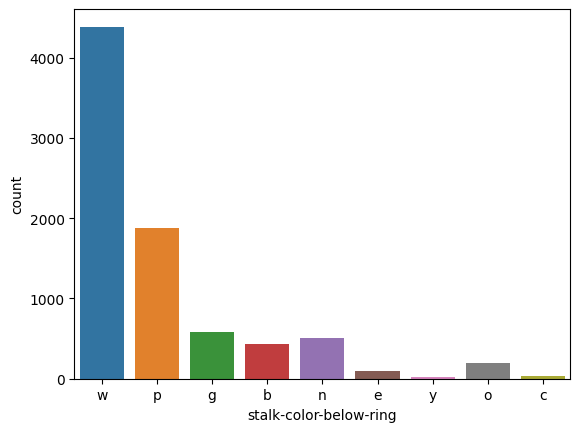

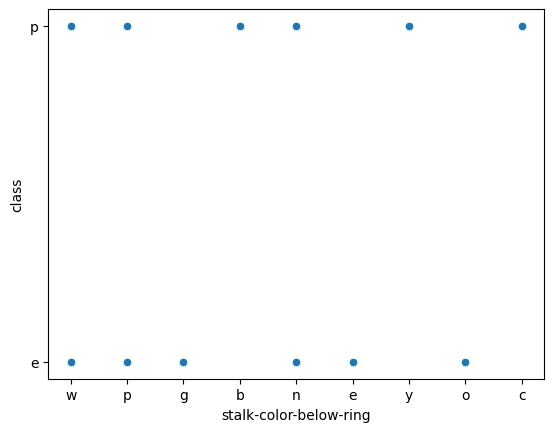

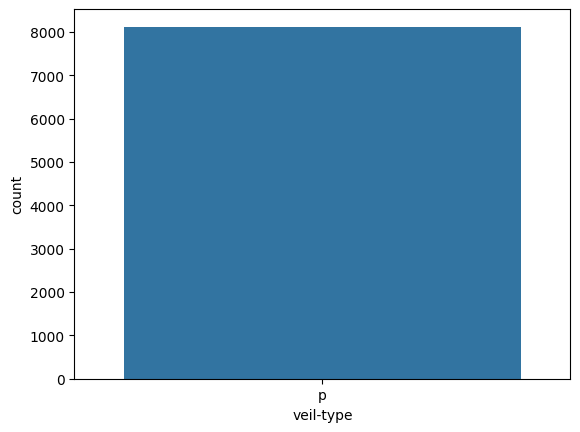

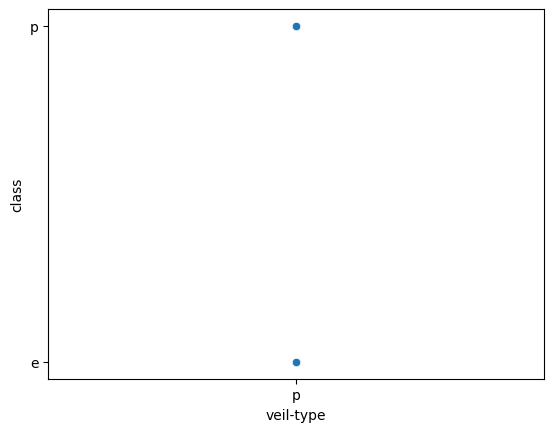

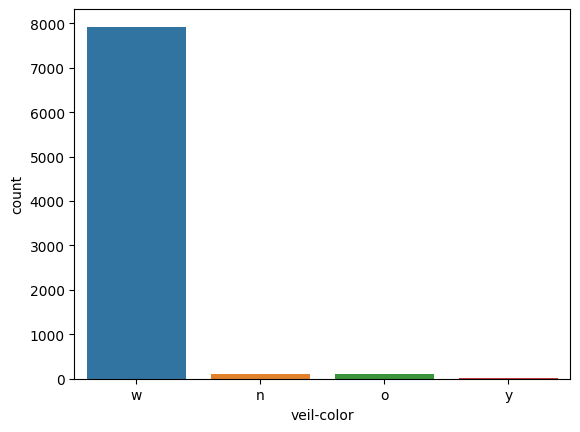

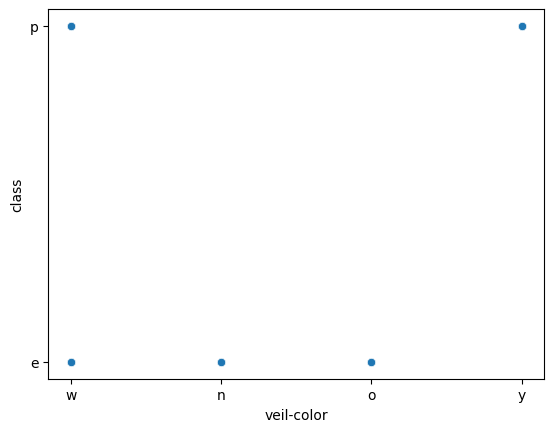

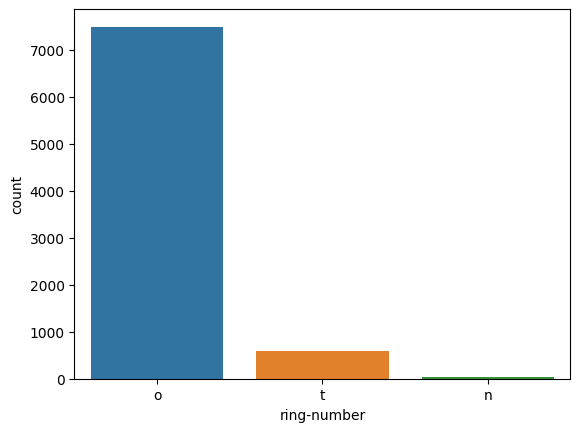

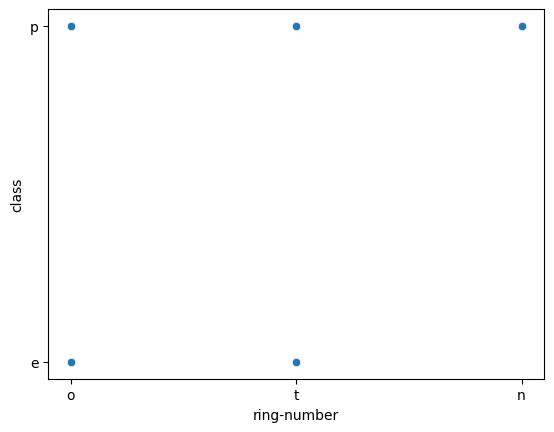

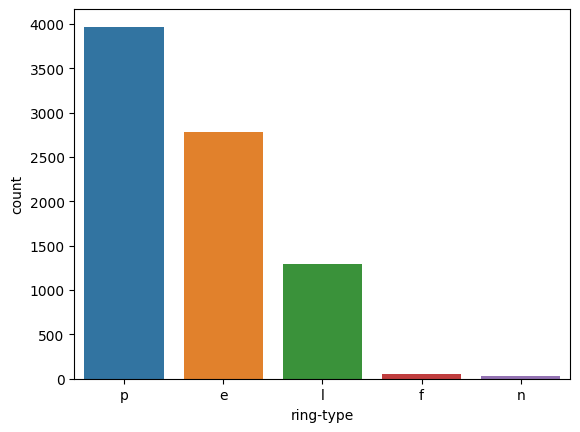

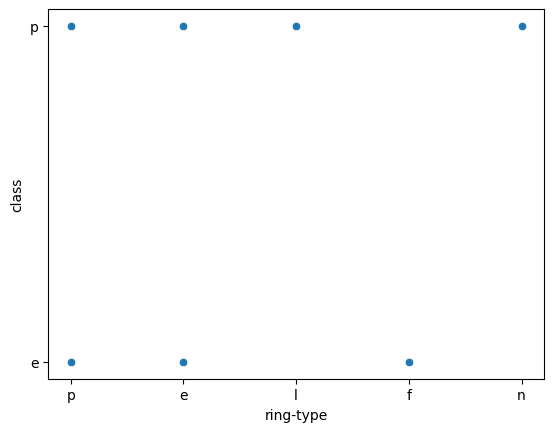

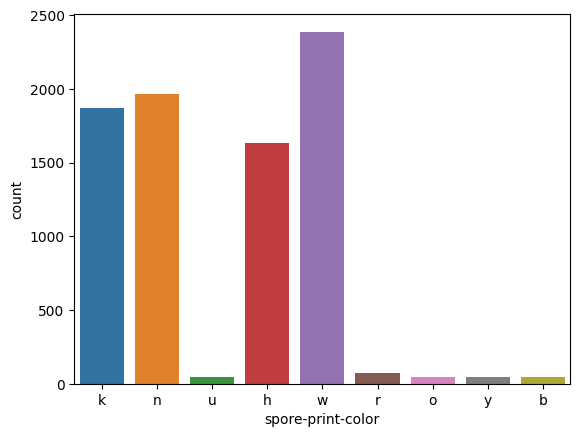

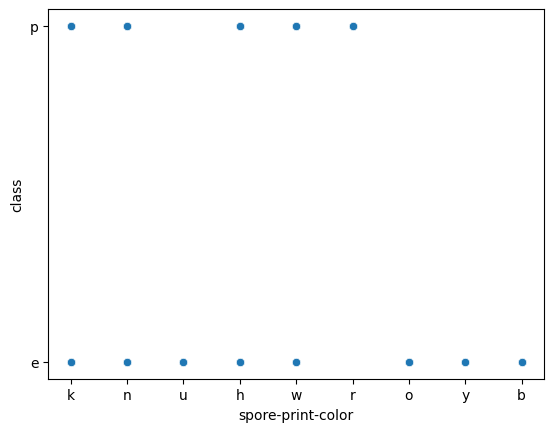

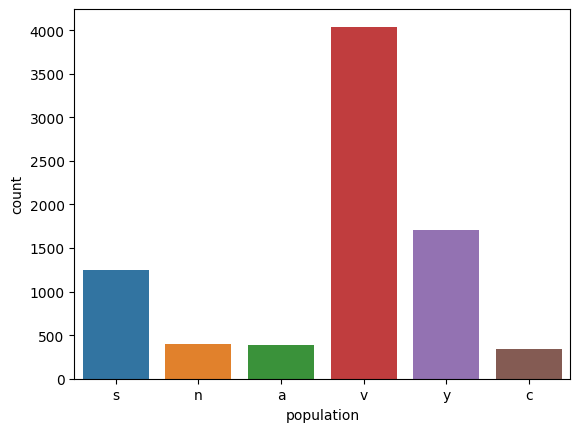

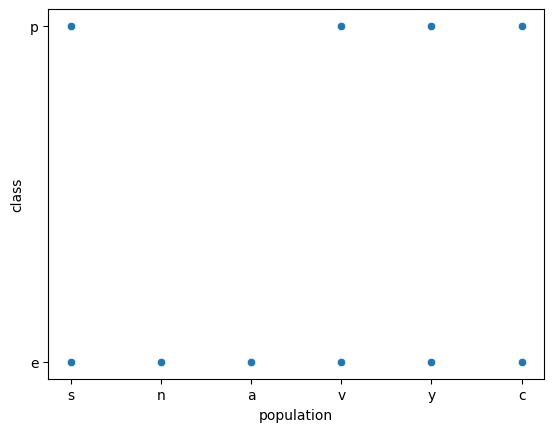

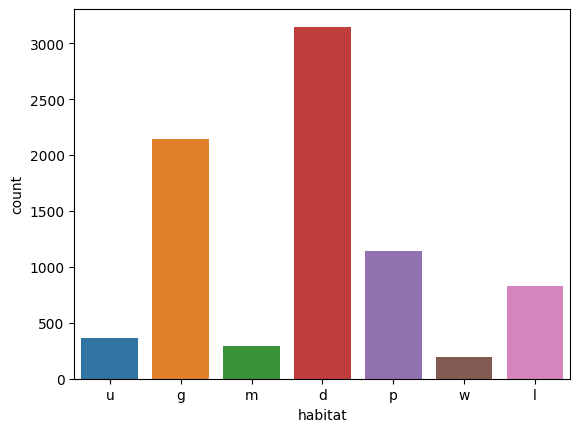

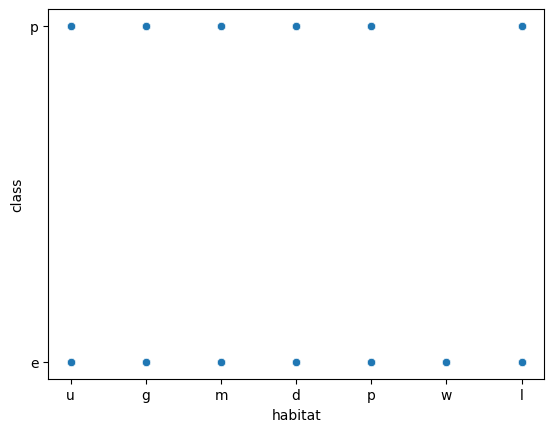

In [9]:
y_col = 'class'

# Iterate over the columns of the dataset
for col in df.columns:

    # Skip the y-axis column
    if col == y_col:
        continue

    # Create a scatter plot for the current column
    

    sns.countplot(x=col, data=df,)
    plt.show()
    sns.scatterplot(data=df,x=col,y=y_col)
    plt.show()

### Observation

1. Some of the properties are qualitative and we need it to be quantitave so that we can use them in classification models. <br/>
2. Here veil-type only have p category meaning there is no information to gather from that data. <br/>
3. Other than that from the graph we can conclude that there is no noticable outliers <br/>
4. The dataset doesnt have any unfilled or NA cell

In [10]:
df = pd.get_dummies(df)
df.head()

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-shape_e,stalk-shape_t,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-surface-below-ring_y,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


Here some details are unescacary creating some extra detail such as if poisonours it cant be edible.
So we can remove one property of in the multiple categorical data.

In [11]:
del df['class_p']
del df['cap-shape_x']
del df['cap-surface_y']
del df['cap-color_y']
del df['bruises_t']
del df['odor_y']
del df['gill-attachment_f']
del df['gill-spacing_w']
del df['gill-size_n']
del df['gill-color_y']
del df['stalk-shape_t']
del df['stalk-root_r']
del df['stalk-surface-above-ring_y']
del df['stalk-surface-below-ring_y']
del df['stalk-color-above-ring_y']
del df['stalk-color-below-ring_y']
del df['veil-color_y']
del df['ring-number_t']
del df['ring-type_p']
del df['spore-print-color_y']
del df['population_y']
del df['habitat_w']

In [12]:
df.describe()

,class_e,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-surface_f,cap-surface_g,cap-surface_s,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,bruises_f,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,gill-attachment_a,gill-spacing_c,gill-size_b,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,stalk-shape_e,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,veil-type_p,veil-color_n,veil-color_o,veil-color_w,ring-number_n,ring-number_o,ring-type_e,ring-type_f,ring-type_l,ring-type_n,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,population_a,population_c,population_n,population_s,population_v,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,0.055638,0.000492,0.387986,0.101920,0.003939,0.285574,0.000492,0.314623,0.020679,0.005416,0.184638,0.226489,0.281142,0.017725,0.001969,0.001969,0.128016,0.584441,0.049237,0.023634,0.265879,0.049237,0.004431,0.434269,0.031512,0.070901,0.025849,0.838503,0.690793,0.212703,0.011817,0.092565,0.090103,0.050222,0.129000,0.007878,0.183653,0.002954,0.060561,0.147957,0.432792,0.305268,0.464796,0.068439,0.137863,0.067947,0.291974,0.637125,0.073855,0.283604,0.607582,0.053176,0.004431,0.011817,0.070901,0.055145,0.023634,0.230428,0.549483,0.053176,0.004431,0.011817,0.070901,0.063023,0.023634,0.230428,0.539636,1.0,0.011817,0.011817,0.975382,0.004431,0.921713,0.341704,0.005908,0.159527,0.004431,0.005908,0.200886,0.230428,0.242245,0.005908,0.008863,0.005908,0.293944,0.047267,0.041851,0.049237,0.153619,0.497292,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298
std,0.499708,0.229235,0.022185,0.487321,0.302562,0.062641,0.451715,0.022185,0.464394,0.142318,0.073399,0.388028,0.418585,0.449584,0.131959,0.044338,0.044338,0.334128,0.492848,0.216375,0.151914,0.441827,0.216375,0.066425,0.495691,0.174706,0.256675,0.158695,0.368011,0.462195,0.409245,0.108068,0.289840,0.286347,0.218415,0.335221,0.088413,0.387225,0.054276,0.238539,0.355079,0.495493,0.460549,0.498790,0.252514,0.344777,0.251670,0.454699,0.480859,0.26

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 97 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   class_e                     8124 non-null   uint8
 1   cap-shape_b                 8124 non-null   uint8
 2   cap-shape_c                 8124 non-null   uint8
 3   cap-shape_f                 8124 non-null   uint8
 4   cap-shape_k                 8124 non-null   uint8
 5   cap-shape_s                 8124 non-null   uint8
 6   cap-surface_f               8124 non-null   uint8
 7   cap-surface_g               8124 non-null   uint8
 8   cap-surface_s               8124 non-null   uint8
 9   cap-color_b                 8124 non-null   uint8
 10  cap-color_c                 8124 non-null   uint8
 11  cap-color_e                 8124 non-null   uint8
 12  cap-color_g                 8124 non-null   uint8
 13  cap-color_n                 8124 non-null   uint8
 14  cap-colo

In [14]:
df.head()

,class_e,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-surface_f,cap-surface_g,cap-surface_s,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,bruises_f,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,gill-attachment_a,gill-spacing_c,gill-size_b,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,stalk-shape_e,stalk-root_?,stalk-root_b,stalk-root_c,stalk-root_e,stalk-surface-above-ring_f,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-below-ring_f,stalk-surface-below-ring_k,stalk-surface-below-ring_s,stalk-color-above-ring_b,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,veil-type_p,veil-color_n,veil-color_o,veil-color_w,ring-number_n,ring-number_o,ring-type_e,ring-type_f,ring-type_l,ring-type_n,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,population_a,population_c,population_n,population_s,population_v,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


We are finished with the data preprocessing and cleaning. Now for the next stage model generation.

## 1. Logistic regression

Logistic regression is a statistical method that models the relationship between a dependent variable and one or more independent variables, with the goal of predicting the probability of a binary outcome. It involves estimating the parameters of a logistic function that maps the input variables to the output probability, which is an S-shaped curve ranging from 0 to 1. Logistic regression is commonly used for classification

In [15]:
x = df.loc[:, df.columns != 'class_e']

In [16]:
y = df['class_e']

### The dataset need to be seperated for both training and testing seperately

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state= 13)

In [18]:
clf_lr = LogisticRegression()
clf_lr.fit(x_train,y_train)

LogisticRegression()

In [19]:
clf_lr.coef_

array([[-3.69795044e-01, -6.42273299e-01, -4.18302461e-02,
        -5.83909616e-02,  4.50087706e-01,  8.42361768e-01,
        -7.95531066e-01, -1.17853158e-01, -8.30933009e-01,
         9.90635777e-01,  3.39597932e-02,  4.49434312e-02,
         4.13572259e-01, -8.21681854e-01,  3.26060735e-01,
         3.30693882e-01, -5.22137015e-01,  5.09963189e-03,
         3.01425232e+00, -2.84619228e+00, -2.58665054e+00,
         3.07782844e+00, -3.24496851e-01,  4.13236390e+00,
        -2.47201130e+00, -6.86463244e-01,  2.21418196e-01,
        -2.31578589e+00,  3.62943750e+00, -2.09565670e+00,
         7.10477148e-01,  3.88863675e-02, -4.02347034e-02,
         4.30466853e-01,  6.56587246e-01,  1.51056799e-01,
         5.43847711e-01, -6.94718848e-01,  3.44183500e-01,
         3.21910080e-01, -9.80524558e-01,  7.40388039e-01,
        -1.98301801e+00,  4.94543848e-01, -3.32764770e-01,
         1.01685599e+00, -1.78811688e+00,  1.49207080e+00,
         1.53006751e+00,  1.82210295e-01,  1.00513213e+0

In [20]:
clf_lr.intercept_

array([-1.59972312])

### Predicting and confusion matrix

In [21]:
clf_lr.predict_proba(x)

array([[0.98005144, 0.01994856],
       [0.00100532, 0.99899468],
       [0.00209836, 0.99790164],
       ...,
       [0.0026786 , 0.9973214 ],
       [0.99628281, 0.00371719],
       [0.00510283, 0.99489717]])

In [22]:
y_pred = clf_lr.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [23]:

confusion_matrix(y_test, y_pred)

array([[783,   0],
       [  0, 842]], dtype=int64)

In [24]:
precision_score(y_test, y_pred)

1.0

In [25]:
recall_score(y_test, y_pred)

1.0

In [26]:
roc_auc_score(y_test, y_pred)

1.0

Here the model predicts the testing portion accuratley.

## 2. Linear Discriminant Analysis

Linear Discriminant Analysis (LDA) is a statistical method that analyzes the relationship between a dependent variable and one or more independent variables, with the goal of finding a linear combination of the input variables that maximizes the separation between two or more classes. It involves modeling the distribution of the input variables for each class and using this information to estimate the probability of a new observation belonging to each class. LDA assumes that the input variables are normally distributed and that the covariance matrix is equal across classes. LDA is commonly used for dimensionality reduction, pattern recognition, and classification problems

In [27]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [28]:
y_pred_lda = clf_lda.predict(x_test) 

In [29]:
y_pred_lda

array([0, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [30]:
confusion_matrix(y_test, y_pred_lda)

array([[783,   0],
       [  0, 842]], dtype=int64)

In [31]:
precision_score(y_test, y_pred)

1.0

In [32]:
recall_score(y_test, y_pred)

1.0

In [33]:
roc_auc_score(y_test, y_pred)

1.0

The model predicts the test portion accurately

## 3.  K-Nearest Neighbors

K-Nearest Neighbors (KNN) is a non-parametric machine learning algorithm used for classification and regression problems. It works by finding the k-nearest data points in the training set to a new observation, and then classifying or predicting the outcome based on the most common class or average value of the k-nearest neighbors. The value of k is a user-defined parameter that affects the model performance and can be tuned using cross-validation. KNN can handle complex decision boundaries and can be used for both binary and multi-class classification problems. It is a simple algorithm that does not require any assumptions about the underlying distribution of the data, but it can be computationally expensive and sensitive to the choice of distance metric and the scaling of the input variables.

In [34]:

scaler = preprocessing.StandardScaler().fit(x_train)
X_train_s= scaler.transform(x_train)

In [35]:
scaler = preprocessing.StandardScaler().fit(x_test)
x_test_s= scaler.transform(x_test)

In [36]:
x_test_s

array([[-0.24638377,  0.        , -0.82069022, ..., -0.18361648,
        -0.39362366, -0.24356115],
       [-0.24638377,  0.        ,  1.21848655, ..., -0.18361648,
        -0.39362366, -0.24356115],
       [-0.24638377,  0.        , -0.82069022, ..., -0.18361648,
        -0.39362366, -0.24356115],
       ...,
       [-0.24638377,  0.        , -0.82069022, ..., -0.18361648,
        -0.39362366, -0.24356115],
       [-0.24638377,  0.        ,  1.21848655, ..., -0.18361648,
        -0.39362366, -0.24356115],
       [-0.24638377,  0.        ,  1.21848655, ..., -0.18361648,
        -0.39362366, -0.24356115]])

In [37]:

clf_knn_1 = KNeighborsClassifier(n_neighbors=1)
clf_knn_1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
confusion_matrix(y_test, clf_knn_1.predict(x_test_s))

e:\programes\python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[783,   0],
       [  0, 842]], dtype=int64)

In [39]:
accuracy_score(y_test, clf_knn_1.predict(x_test_s))

e:\programes\python\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1.0

In [40]:
clf_knn_3 = KNeighborsClassifier(n_neighbors=3)
clf_knn_3.fit(X_train_s, y_train)
accuracy_score(y_test, clf_knn_3.predict(x_test_s))

1.0

In [41]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,30]}

In [42]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(), params)

In [43]:
grid_search_cv.fit(X_train_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,
                                         30]})

In [44]:
grid_search_cv.best_params_

{'n_neighbors': 1}

In [45]:
optimised_KNN = grid_search_cv.best_estimator_

In [46]:
y_test_pred = optimised_KNN.predict(x_test_s) 

In [47]:
confusion_matrix(y_test, y_test_pred)

array([[783,   0],
       [  0, 842]], dtype=int64)

In [48]:
accuracy_score(y_test, y_test_pred)

1.0

The model predicts the testing portion accurately, but it requires some time to train it.

## 4. Classification Tree

Decision tree is a machine learning algorithm used for both classification and regression tasks. It works by constructing a tree-like model of decisions and their possible consequences based on the input variables. Each internal node of the tree represents a decision based on a specific input variable, while each leaf node represents the outcome or prediction. The algorithm builds the tree recursively by splitting the data at each node based on the input variable that provides the most information gain or reduction in entropy. Decision trees can handle both categorical and continuous input variables and can handle missing values. They can be easily visualized and interpreted, and can handle non-linear relationships between input and output variables. However, decision trees can be prone to overfitting, especially if the tree is too deep or if there are many noisy or irrelevant input variables.

In [49]:

clftree = tree.DecisionTreeClassifier(max_depth = 3)

In [50]:
clftree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [51]:
y_train_pred = clftree.predict(x_train)
y_test_pred = clftree.predict(x_test)

In [52]:
confusion_matrix(y_test, y_test_pred)

array([[774,   9],
       [ 32, 810]], dtype=int64)

In [53]:
accuracy_score(y_test, y_test_pred)

0.9747692307692307

Decision tree plot

In [54]:
dot_data = tree.export_graphviz(clftree, out_file=None,feature_names= x_train.columns, filled = True)

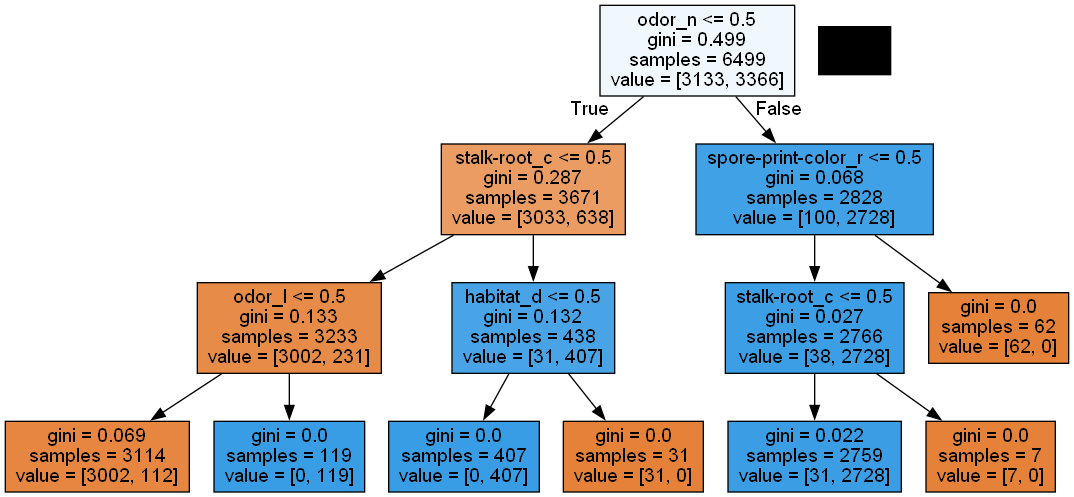

In [55]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

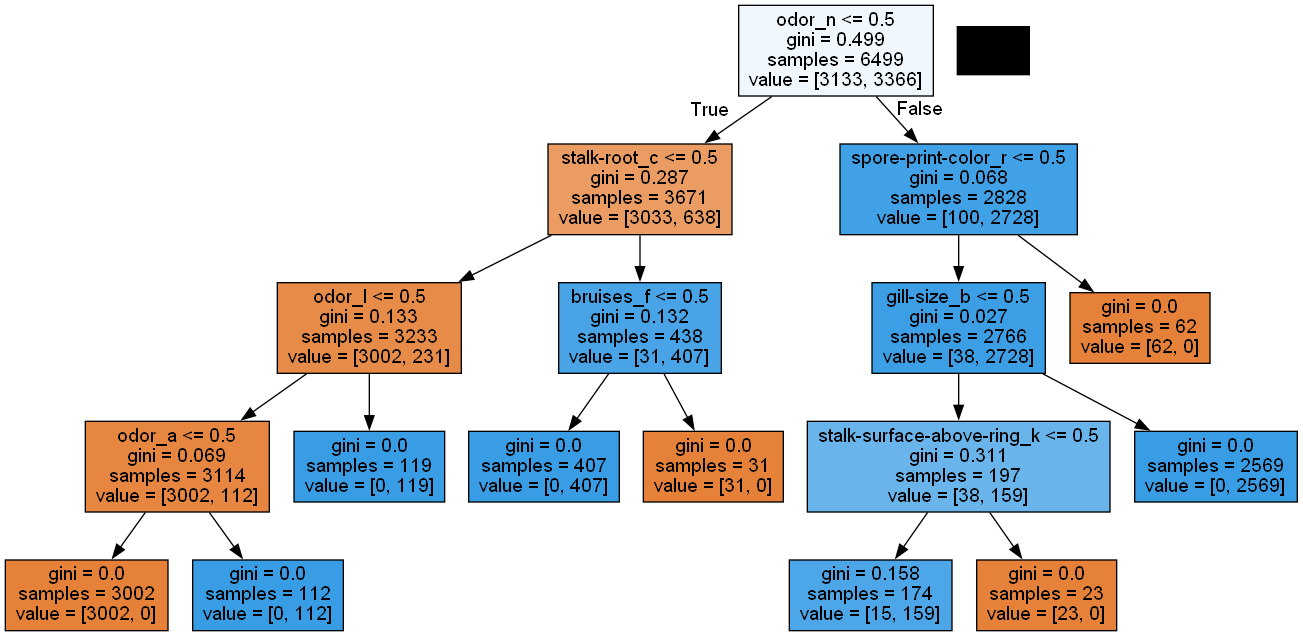

In [56]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth=4)
clftree2.fit(x_train, y_train)
dot_data = tree.export_graphviz(clftree2, out_file=None,feature_names= x_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [57]:
accuracy_score(y_test, clftree2.predict(x_test))

0.9993846153846154

### Bagging

In [58]:
bag_clf = BaggingClassifier(base_estimator=clftree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [59]:
bag_clf.fit(x_train, y_train)

e:\programes\python\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=1000, n_jobs=-1, random_state=42)

In [60]:
confusion_matrix(y_test, bag_clf.predict(x_test))

array([[774,   9],
       [ 32, 810]], dtype=int64)

In [61]:
accuracy_score(y_test, bag_clf.predict(x_test))

0.9747692307692307

## 5. Random Forest

In [62]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)

In [63]:
rf_clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [64]:
confusion_matrix(y_test, rf_clf.predict(x_test))

array([[783,   0],
       [  0, 842]], dtype=int64)

In [65]:
accuracy_score(y_test, rf_clf.predict(x_test))

1.0

In [66]:
rf_clf = RandomForestClassifier(n_estimators=250,random_state=42)

In [67]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10],
              }
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [68]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [69]:
cvrf_clf = grid_search.best_estimator_
accuracy_score(y_test, cvrf_clf.predict(x_test))

1.0

In [70]:
confusion_matrix(y_test, cvrf_clf.predict(x_test))

array([[783,   0],
       [  0, 842]], dtype=int64)

### Gradient Boosting

In [71]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [72]:
accuracy_score(y_test, gbc_clf.predict(x_test))

1.0

In [73]:
gbc_clf2 = GradientBoostingClassifier(learning_rate =0.02, n_estimators =1000, max_depth = 1)
gbc_clf2.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [74]:
accuracy_score(y_train, gbc_clf2.predict(x_train))

0.9950761655639329

In [75]:
accuracy_score(y_test, gbc_clf2.predict(x_test))

0.9938461538461538

### Ada boost

In [76]:
ada_clf = AdaBoostClassifier(learning_rate =0.02, n_estimators =5000)

In [77]:
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [78]:
accuracy_score(y_test, ada_clf.predict(x_test))

1.0

### XG boost

In [79]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)

In [80]:
xgb_clf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10000, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [81]:
accuracy_score(y_test, xgb_clf.predict(x_test))

1.0

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

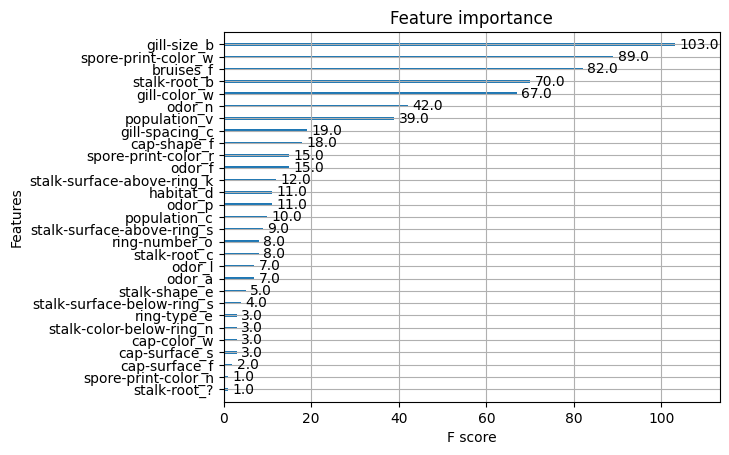

In [82]:
xgb.plot_importance(xgb_clf)

In [83]:
xgb_clf = xgb.XGBClassifier(n_estimators=250,learning_rate=0.1, random_state=42)

In [84]:
param_test1 = {
 'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

In [85]:
grid_search = GridSearchCV(xgb_clf, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

This model predicts the test portion accurately, but it takes some time until it can be trained.

## 6. Support vector machine

Support Vector Machine (SVM) is a powerful machine learning algorithm used for classification, regression, and outlier detection tasks. It works by finding the optimal hyperplane that separates the input data into different classes or groups, with the maximum margin between the hyperplane and the closest data points of each class. SVM can handle both linear and non-linear decision boundaries by transforming the input data into a higher-dimensional space using kernel functions. SVM aims to maximize the margin while minimizing the classification error and can handle both binary and multi-class classification problems. SVM is a popular algorithm due to its ability to handle high-dimensional and complex data, and its effectiveness even with relatively small datasets. However, SVM can be computationally expensive, especially for large datasets, and the choice of the kernel function and hyperparameters can significantly affect the model's performance.

In [86]:
sc = StandardScaler().fit(x_train)

In [87]:
x_train_std = sc.transform(x_train)

In [88]:
x_test_std = sc.transform(x_test)

In [89]:
clf_svm_l = svm.SVC(kernel='linear', C=100)
clf_svm_l.fit(x_train_std, y_train)

SVC(C=100, kernel='linear')

In [90]:
y_train_pred = clf_svm_l.predict(x_train_std)
y_test_pred = clf_svm_l.predict(x_test_std)

In [91]:
confusion_matrix(y_test, y_test_pred)

array([[783,   0],
       [  0, 842]], dtype=int64)

In [92]:
accuracy_score(y_test, y_test_pred)

1.0

In [93]:
clf_svm_l.n_support_

array([82, 96])

In [94]:
params = {'C':(0.001,0.005,0.01,0.05, 0.1, 0.5, 1, 5, 10, 50,100,500,1000)} 

In [95]:
clf_svm_l = svm.SVC(kernel='linear')

In [96]:
svm_grid_lin = GridSearchCV(clf_svm_l, params, n_jobs=-1,
                            cv=10, verbose=1, scoring='accuracy') 

In [97]:
svm_grid_lin.fit(x_train_std, y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,
                               100, 500, 1000)},
             scoring='accuracy', verbose=1)

In [98]:
svm_grid_lin.best_params_ 

{'C': 0.1}

In [99]:
linsvm_clf = svm_grid_lin.best_estimator_

In [100]:
accuracy_score(y_test, linsvm_clf.predict(x_test_std))

1.0

This model predicts the test portion.

## Conclusion

Here all the models provided the same accuracy to the data of 1.0. But the core of this is to find the best predicatable model for the data. For predicatability and best complex relation. Due to higher ammount of data and multiple variables with higher correlation all the models tested have best predictions. So the performance and time taken are considered here. Here logistic regression have the lowest time taken. So, for this requirment even logistic regression is best. 

#### Insights and keyfindings

Here whether gill size being broad or narrower influences the result more than any other feature and the stalker root bieng unknown being the least. <b\>
Due to being logistic regression having a good accuracy data have a linear relation to the edibility.

Due to perfect accuracy and prediction there is no more additional features needed for improving the model.